Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images,
Test Data = 10,000 Images



Image dimension ---> 28 x 28,
Grayscale image ---> 1 channel

In [ ]:
#printing the 10th image

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


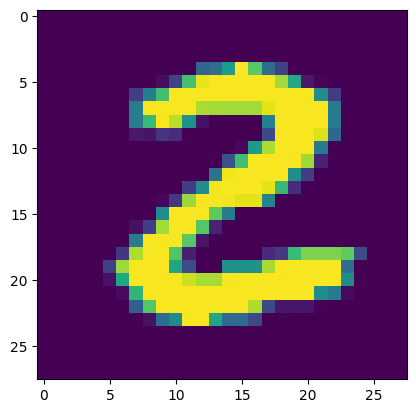

2


In [ ]:
#displaying the image

plt.imshow(x_train[25])
plt.show()

#print the corresponding label
print(y_train[25])

Image Labels

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y_train

print(np.unique(y_train))

#unique values in y_test

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images  have same dimension in this dataset. if not we have to resize all the images to a common dimension

In [ ]:
#scaling the values

x_train = x_train/255
x_test = x_test/255

In [ ]:
#printing the 10th image

print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
#setting up layers of the neural network

model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)), #input layer
                           keras.layers.Dense(50, activation='relu'),#hidden layer with 50 neurons
                           keras.layers.Dense(50, activation='relu'),#hidden layer with 50 neurons
                           keras.layers.Dense(10, activation='sigmoid') #output layer 10--> 0-9 labels
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the neural newtwork

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])





In [ ]:
#training the neural network

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8449 - loss: 0.5260
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9562 - loss: 0.1469
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9683 - loss: 0.1049
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9758 - loss: 0.0813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9811 - loss: 0.0647
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9845 - loss: 0.0536
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9871 - loss: 0.0455
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9890 - loss: 0.0388
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0339
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0310


Training data accuracy is :- 99.08%

**Accuracy on Test Data**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9689 - loss: 0.1313
0.9718999862670898
0.1181323379278183


Test data accuracy is :- 97.1%

In [ ]:
print(x_test.shape)

(10000, 28, 28)


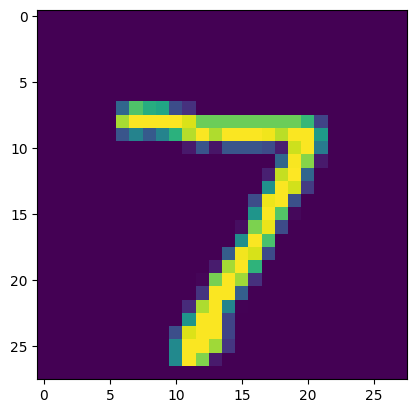

In [ ]:
#first data point in x_test

plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


In [ ]:
print(y_pred[0])

[1.0417354e-05 1.7297745e-03 3.5594195e-01 3.7631124e-01 4.3355685e-05
 6.2874885e-04 2.5739906e-08 9.9999154e-01 1.7817622e-03 1.9847862e-02]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
#converting the prediction probabilty to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probabilty to class label for test data points

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 4, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(y_pred)

[[1.0417354e-05 1.7297745e-03 3.5594195e-01 ... 9.9999154e-01
  1.7817622e-03 1.9847862e-02]
 [4.8382636e-03 8.4126961e-01 1.0000000e+00 ... 1.0387556e-03
  1.6823129e-04 1.3544998e-08]
 [9.1142842e-04 9.9992990e-01 3.2470861e-01 ... 8.1928533e-01
  7.9671338e-02 4.1015129e-04]
 ...
 [2.6476002e-08 3.0324644e-01 3.9183176e-10 ... 3.0160519e-01
  5.1456105e-02 2.5766888e-01]
 [1.6281048e-09 3.0159781e-06 5.5288663e-10 ... 2.3917672e-05
  9.9969566e-01 2.0112686e-06]
 [1.2808469e-01 9.2558257e-06 9.0563640e-02 ... 9.6049432e-11
  1.2587302e-05 4.1281805e-08]]


y_test  -> Test labels

y_pred_labels -> Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 964    0    2    3    3    1    0    1    2    4]
 [   0 1119    3    2    1    0    4    1    5    0]
 [   3    0 1007    6    1    0    2    5    6    2]
 [   0    0    5  989    1    3    0    2    4    6]
 [   1    0    2    2  966    0    5    0    1    5]
 [   3    0    0   17    5  857    2    0    7    1]
 [   6    2    3    1   10    7  926    0    3    0]
 [   0    4   11    1    2    0    0  994    4   12]
 [   3    1    6   17    5    1    3    3  933    2]
 [   2    1    1    7   19    4    0    8    4  963]], shape=(10, 10), dtype=int32)


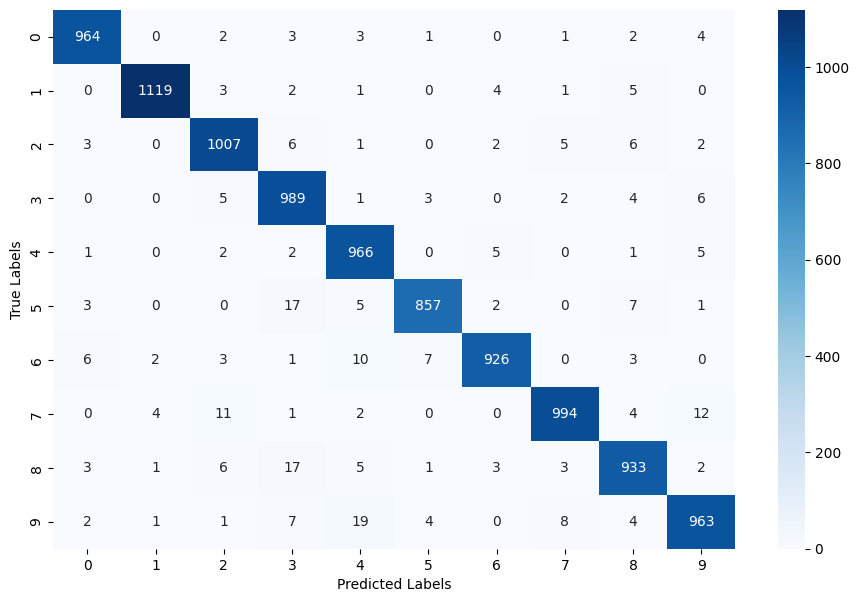

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

**Building a predictinve system**

In [45]:
input_image_path = "/content/MNIST_digit.png"

input_image = cv2.imread(input_image_path)


In [46]:
type(input_image)

numpy.ndarray

In [47]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


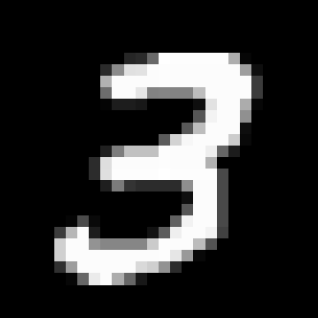

In [50]:
cv2_imshow(input_image)


In [51]:
input_image.shape

(318, 318, 3)

In [54]:
#convert to grayscale

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
print(grayscale.shape)

(318, 318)


In [55]:
input_image_resize = cv2.resize(grayscale, (28,28))
print(input_image_resize.shape)

(28, 28)


In [56]:
cv2_imshow(input_image_resize)

In [57]:
input_image_resize = input_image_resize/255

In [58]:
# input_reshaped = np.reshape(input_image_resize, [1,28,28])
# print(input_reshaped.shape)

(1, 28, 28)


In [59]:
type(input_image_resize)

numpy.ndarray

In [67]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [68]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[2.9452731e-12 1.8418634e-05 1.8337725e-01 1.0000000e+00 5.2932021e-16
  5.2787915e-02 1.4235441e-15 2.9551534e-02 1.9515032e-01 1.4451340e-01]]


In [69]:
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

3


Path of the image to be predicted/content/MNIST_digit.png


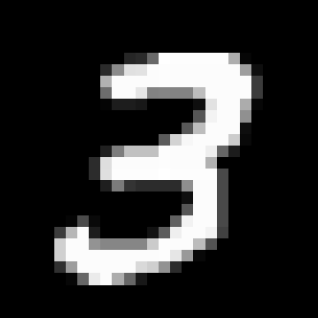

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The Handwritten digit is recognized as  3


In [71]:
#predictive system


input_image_path = input("Path of the image to be predicted")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)


grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten digit is recognized as ', input_pred_label)



